In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")

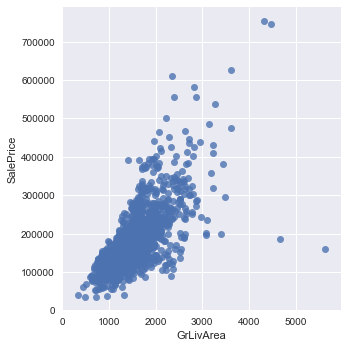

In [33]:
sns.lmplot('GrLivArea', 'SalePrice', data=data, fit_reg=False)
plt.show()

In [34]:
data['Normalized_Area'] = (data['GrLivArea'] - data['GrLivArea'].mean())/data['GrLivArea'].std()

#Grab the relevant data, scale the predictor variable for the gradient descent...
x = data['Normalized_Area']
y = data['SalePrice']
print('-----------')
print(data['GrLivArea'])
print('-----------')
print(x)
print('-----------')
print(y)

-----------
0       1710
1       1262
2       1786
3       1717
4       2198
5       1362
6       1694
7       2090
8       1774
9       1077
10      1040
11      2324
12       912
13      1494
14      1253
15       854
16      1004
17      1296
18      1114
19      1339
20      2376
21      1108
22      1795
23      1060
24      1060
25      1600
26       900
27      1704
28      1600
29       520
        ... 
1430    1838
1431     958
1432     968
1433    1792
1434    1126
1435    1537
1436     864
1437    1932
1438    1236
1439    1725
1440    2555
1441     848
1442    2007
1443     952
1444    1422
1445     913
1446    1188
1447    2090
1448    1346
1449     630
1450    1792
1451    1578
1452    1072
1453    1140
1454    1221
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64
-----------
0       0.370207
1      -0.482347
2       0.514836
3       0.383528
4       1.298881
5      -0.292045
6       0.339758
7       1.093354
8  

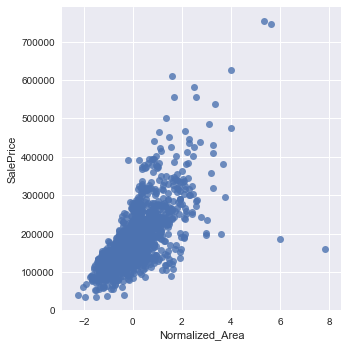

In [35]:
sns.lmplot('Normalized_Area', 'SalePrice', data=data, fit_reg=False)
plt.show()

In [5]:
#GRADIENT DESCENT

alpha = 0.001 #Step size
iterations = 2000 #No. of iterations
m = y.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(2) #Pick some random values to start with

print(theta)

[ 0.69646919  0.28613933]


In [46]:
#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
    """
    TODO: Implement the algorithm
    Pseudocode
    for i to iterations
        compute current cost value
        compute gradients
        update theta => thetha = thetha - alpha * gradient
    return theta and cost
    """
    gradient = np.zeros(2)
    costs = np.array(0)
    for i in range(0, iterations):
        p = theta[0]+(theta[1]*x)
        loss = p - y
        cost = np.sum(loss **2)/(2*m)
        gradient[0] = np.sum(p - y)/m
        gradient[1] = np.sum(x*(p-y))
        theta = theta - alpha * gradient
        costs = np.vstack((costs, cost))
    return theta, cost, costs

#Pass the relevant variables to the function and get the new values back...
theta, cost, costs = gradient_descent(x, y, theta, iterations, alpha)

print("Cost: {:.2f}".format(cost))
#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Cost: 1569921605.12
Gradient Descent: 180920.43, 56294.90


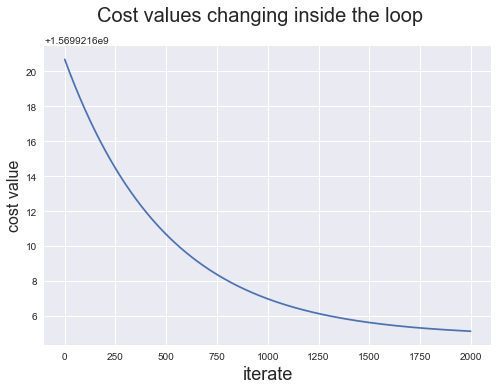

[[  0.00000000e+00]
 [  1.56992162e+09]
 [  1.56992162e+09]
 ..., 
 [  1.56992161e+09]
 [  1.56992161e+09]
 [  1.56992161e+09]]


In [71]:
# plot costs iterate values
fig = plt.figure()
fig.suptitle('Cost values changing inside the loop', fontsize=20)
plt.xlabel('iterate', fontsize=18)
plt.ylabel('cost value', fontsize=16)
plt.plot(costs[1:])
plt.show()
print(costs)

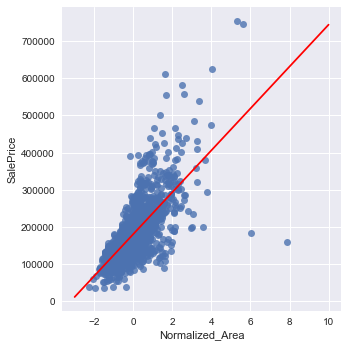

In [64]:
#Plot the regression line obtained from our algorithm
x_line = np.linspace(-3, 10, 100)
y_line = theta[0] + theta[1] * x_line
sns.lmplot('Normalized_Area', 'SalePrice', data=data, fit_reg=False)
plt.plot(x_line, y_line, 'r')
plt.show()